/tmp/ipython-input-1636425461.py:10: DtypeWarning: Columns (0,1,2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Unemployment in India.csv")
/tmp/ipython-input-1636425461.py:19: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


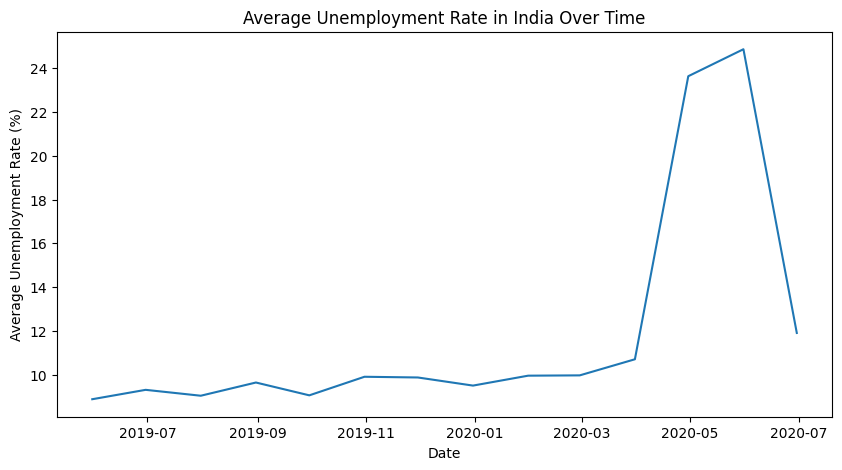

Pre-COVID Mean: 9.508323969496612
Post-COVID Mean: 17.78025991704374
Pre-COVID Std Dev: 0.41930272108130096
Post-COVID Std Dev: 7.513354625422613


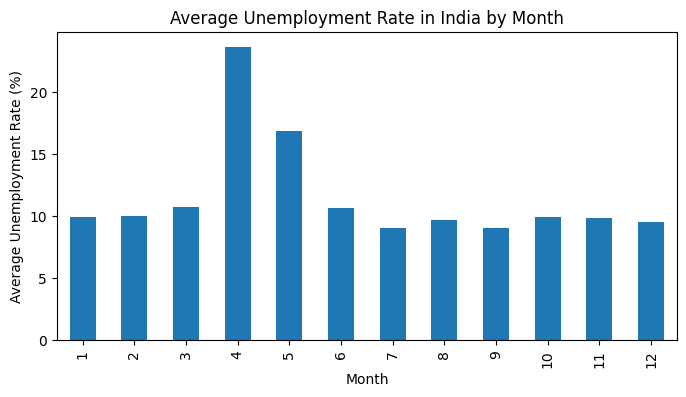

In [30]:
# Unemployment Rate Analysis in India
# Task: Data Cleaning, EDA, COVID Impact, Seasonality

import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load Dataset
# -------------------------------
df = pd.read_csv("Unemployment in India.csv")

# -------------------------------
# 2. Data Cleaning
# -------------------------------
# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# -------------------------------
# 3. Aggregate Data (Mean by Date)
# -------------------------------
df_grouped = (
    df.groupby('Date')['Estimated Unemployment Rate (%)']
      .mean()
      .reset_index()
)

# -------------------------------
# 4. Trend Visualization
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(df_grouped['Date'], df_grouped['Estimated Unemployment Rate (%)'])
plt.xlabel("Date")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Average Unemployment Rate in India Over Time")
plt.show()

# -------------------------------
# 5. COVID-19 Impact Analysis
# -------------------------------
pre_covid = df_grouped[df_grouped['Date'] < '2020-03-01']
post_covid = df_grouped[df_grouped['Date'] >= '2020-03-01']

pre_mean = pre_covid['Estimated Unemployment Rate (%)'].mean()
post_mean = post_covid['Estimated Unemployment Rate (%)'].mean()

pre_std = pre_covid['Estimated Unemployment Rate (%)'].std()
post_std = post_covid['Estimated Unemployment Rate (%)'].std()

print("Pre-COVID Mean:", pre_mean)
print("Post-COVID Mean:", post_mean)
print("Pre-COVID Std Dev:", pre_std)
print("Post-COVID Std Dev:", post_std)

# -------------------------------
# 6. Seasonal Trend Analysis
# -------------------------------
df_grouped['Month'] = df_grouped['Date'].dt.month

monthly_avg = (
    df_grouped.groupby('Month')['Estimated Unemployment Rate (%)']
    .mean()
)

plt.figure(figsize=(8,4))
monthly_avg.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Average Unemployment Rate in India by Month")
plt.show()
